simple linear autoencoder performing PCA

In [1]:
import tensorflow as tf
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape= [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape= [2])])
autoencoder = keras.models.Sequential([encoder, decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep (Stacked) Autoencoders on Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [3]:
X_valid, X_train = X_train[ :5000] / 255. , X_train[5000: ] / 255.0
y_valid, y_train = y_train[ :5000] , y_train[5000: ]
X_train.shape

(55000, 28, 28)

In [9]:
# stacked autoencoder
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(100, activation= "selu"),
    keras.layers.Dense(30, activation= "selu")
])

decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation= "selu", input_shape= [30]),
    keras.layers.Dense(28 * 28, activation= "sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([encoder, decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
stacked_ae.compile(
    loss= "binary_crossentropy",
    optimizer= keras.optimizers.SGD(learning_rate= 1.5)
)

history = stacked_ae.fit(X_train, X_train, epochs= 20, validation_data= [X_valid, X_valid]) # no y_train, y_valid

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3800 - val_loss: 0.3081
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3065 - val_loss: 0.2987
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2998 - val_loss: 0.2933
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2949 - val_loss: 0.2909
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2924 - val_loss: 0.2881
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2906 - val_loss: 0.2864
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2887 - val_loss: 0.2840
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2876 - val_loss: 0.2843
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2866 - val_loss: 0.2841
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2862 - val_loss: 0.2827
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2844 - val_loss: 0.2820
Epoch 12/20
1719/1719 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


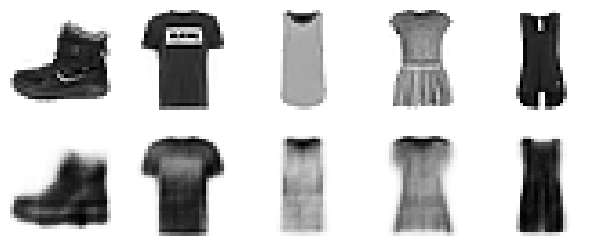

In [15]:
# visualize the reconstruction
import matplotlib.pyplot as plt
%matplotlib inline

def plot_image(image):
  plt.imshow(image, cmap= "binary") # binary : white = 0, black = 1, reverse of gray
  plt.axis("off")

def show_reconstructions(model, n_images= 5):
  reconstructions =model.predict(X_valid[ :n_images])
  fig = plt.figure(figsize= (n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, image_index + 1)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

  fig.show()

show_reconstructions(stacked_ae)


Visualizing Fashion MNIST Dataset

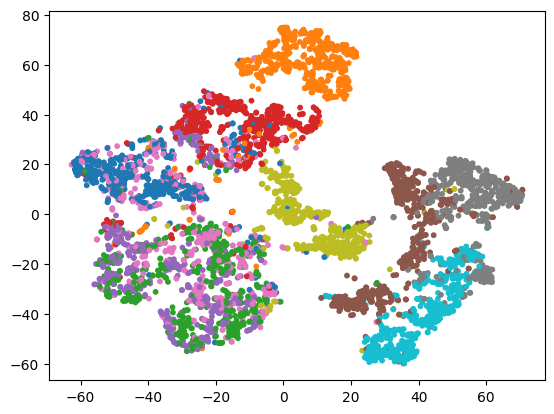

In [17]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

# plot
plt.scatter(X_valid_2D[ : , 0], X_valid_2D[ : , 1], c = y_valid, s= 10, cmap= "tab10")